PROBLEM STATEMENT

The company is entering the aviation industry but lacks knowledge about risks associated with different aircraft types

PROPOSED SOLUTION

Use the aviation daraset to identify the lowest-risk aircraft to prioritize for purchase and operation.

OBJECTIVES

Main Objective:

Recommend safe aircraft for the new aviation division.

Secondary Objectives:

Handle missing values and clean dataset.

Analyze trends by aircraft type, make, engines, etc.

Create visualizations for stakeholders.

Summarize actionable business insights.


DATA ANALYSIS, CLEANING AND VISUALIZATION

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_aviation = pd.read_csv('Aviation_Data.csv')
df_aviation.head()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df_aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
df_aviation.shape

(90348, 31)

In [5]:
df_aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
df_aviation.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [7]:
missing_percent = (df_aviation.isnull().sum() / len(df_aviation)) * 100
missing_percent.sort_values(ascending=False)

Schedule                  86.073848
Air.carrier               81.573471
FAR.Description           64.555939
Aircraft.Category         64.263736
Longitude                 61.954886
Latitude                  61.944924
Airport.Code              44.382831
Airport.Name              41.570372
Broad.phase.of.flight     31.681941
Publication.Date          18.471909
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Fatal.Injuries      14.233851
Engine.Type                9.447913
Report.Status              8.677558
Purpose.of.flight          8.468367
Number.of.Engines          8.348829
Total.Uninjured            8.158454
Weather.Condition          6.586753
Aircraft.damage            5.150086
Registration.Number        3.072564
Injury.Severity            2.721698
Country                    1.865011
Amateur.Built              1.727764
Model                      1.716695
Make                       1.684597
Location                   1.672422
Event.Date                 1

In [8]:
#keep only relevant columns
relevant_columns = [
    "Event.Id",
    "Event.Date",
    "Location",
    "Country",
    "Injury.Severity",
    "Aircraft.Category",
    "Make",
    "Model",
    "Number.of.Engines",
    "Engine.Type",
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured"
]

In [9]:
df_aviation = df_aviation[relevant_columns]
df_aviation.shape

(90348, 14)

In [11]:
df_aviation.head()

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),NaN,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),NaN,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),NaN,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),NaN,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),NaN,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0


In [10]:
#have a copy when subsetting so changes may stick
df_aviation = df_aviation[relevant_columns].copy()

In [12]:
df_aviation.isnull().sum()

Event.Id                   1459
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.Category         58061
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
dtype: int64

In [13]:
#drop the columns that are too incomplete

df_aviation.drop(columns=['Aircraft.Category'], inplace=True)


In [ ]:
#handle duplicates
df_duplicates = df_aviation.duplicated().value_counts()   #will return 'true' which are duplicated and 'false' are not duplicated.
df_duplicates

False    88821
True      1527
dtype: int64

In [15]:
#view the first 15 duplicates
df_aviation[df_aviation.duplicated()].head(15)

,Event.Id,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
981,20020917X02558,1982-04-25,"NEW YORK, NY",United States,Non-Fatal,Bell,206L,1.0,Turbo Shaft,0.0,0.0,2.0,4.0
1371,20020917X02935,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Cessna,172,1.0,Reciprocating,0.0,0.0,0.0,7.0
2851,20020917X04423,1982-09-23,"PONTIAC, MI",United States,Incident,Cessna,152,1.0,Reciprocating,0.0,0.0,0.0,3.0
3082,20020917X04638,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Bell,206B,1.0,Turbo Shaft,3.0,0.0,0.0,0.0
3830,20001214X42191,1983-02-06,"HOUSTON, TX",United States,Non-Fatal,Cessna,550,2.0,Turbo Fan,0.0,0.0,0.0,8.0
4008,20001214X42112,1983-02-28,"ANCHORAGE, AK",United States,Non-Fatal,Raven,RX-7,NaN,Unknown,0.0,0.0,0.0,5.0
4761,20001214X43016,1983-05-22,"BRIDGEPORT, CA",United States,Fatal(1),Schempp-hirth,STANDARD CIRRUS,NaN,Unknown,1.0,0.0,0.0,1.0
5120,20001214X43239,1983-06-20,"CHICAGO, IL",United States,Incident,Boeing,B-747,4.0,Turbo Fan,0.0,0.0,0.0,440.0
5398,20001214X43847,1983-07-10,"JACKSONVILLE, FL",United States,Non-Fatal,Pterodactyl,ASCENDER,1.0,Reciprocating,0.0,1.0,0.0,1.0
6512,20001214X44879,1983-10-08,"FRESNO, CA",United States,Non-Fatal,North American,SNJ-2,1.0,Reciprocating,0.0,0.0,0.0,2.0


In [16]:
# Use 'keep=False' to keep all duplicates and 'sort_values' to put duplicates next to each other
df_aviation[df_aviation.duplicated(keep=False)].sort_values(by='Event.Id')

,Event.Id,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
45719,20001205X00305,1999-03-05,"DENVER, CO",United States,Non-Fatal,Swearingen,SA226TC,2.0,Turbo Prop,0.0,0.0,0.0,2.0
45716,20001205X00305,1999-03-05,"DENVER, CO",United States,Non-Fatal,Swearingen,SA226TC,2.0,Turbo Prop,0.0,0.0,0.0,2.0
34513,20001206X00768,1994-02-12,"GRAND CANYON, AZ",United States,Non-Fatal,Cessna,402C,2.0,Reciprocating,0.0,0.0,0.0,3.0
34512,20001206X00768,1994-02-12,"GRAND CANYON, AZ",United States,Non-Fatal,Cessna,402C,2.0,Reciprocating,0.0,0.0,0.0,3.0
34847,20001206X01157,1994-04-10,"OKEECHOBEE, FL",United States,Non-Fatal,Globe,9C-1B,1.0,Reciprocating,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop duplicate accidents based on Event.Id
df_aviation = df_aviation.drop_duplicates(subset=["Event.Id"])
df_aviation.shape

(87952, 13)

In [18]:
#drop rows where Event Id is missing
df_aviation=df_aviation.dropna(subset=["Event.Id"])

# Drop rows where Make is missing 
df_aviation = df_aviation.dropna(subset=["Make"])

#drop rows where model is missing
df_aviation=df_aviation.dropna(subset=["Model"])

# Drop rows where Engine Type is missing
df_aviation = df_aviation.dropna(subset=["Engine.Type"])

df_aviation.shape

(80886, 13)

In [19]:
df_aviation.columns.tolist()

['Event.Id',
 'Event.Date',
 'Location',
 'Country',
 'Injury.Severity',
 'Make',
 'Model',
 'Number.of.Engines',
 'Engine.Type',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured']

In [20]:
df_aviation.isna().sum() #checking for sum of null values

Event.Id                      0
Event.Date                    0
Location                     46
Country                     216
Injury.Severity             194
Make                          0
Model                         0
Number.of.Engines          2022
Engine.Type                   0
Total.Fatal.Injuries      10409
Total.Serious.Injuries    11226
Total.Minor.Injuries      10550
Total.Uninjured            5017
dtype: int64

In [21]:
injury_cols = ["Total.Fatal.Injuries","Total.Serious.Injuries", "Total.Minor.Injuries","Total.Uninjured"]

df_aviation[injury_cols] = df_aviation[injury_cols].fillna(0) #to avoid errors while summing


In [22]:
#Convert Event.Date to datetime & extract Year
df_aviation["Event.Date"] = pd.to_datetime(df_aviation["Event.Date"], errors="coerce")
df_aviation["Year"] = df_aviation["Event.Date"].dt.year

In [23]:
#Standardize text fields to avoid duplicates
df_aviation["Make"] = df_aviation["Make"].str.upper().str.strip()
df_aviation["Model"] = df_aviation["Model"].str.upper().str.strip()

In [24]:
# Fill small categorical nulls
df_aviation["Location"] = df_aviation["Location"].fillna("Unknown")
df_aviation["Country"] = df_aviation["Country"].fillna("Unknown")
df_aviation["Injury.Severity"] = df_aviation["Injury.Severity"].fillna("Unknown")


In [25]:
# Optional: handle missing engine numbers
mode_engines = df_aviation["Number.of.Engines"].mode()[0]   # get the most common value
df_aviation["Number.of.Engines"].fillna(mode_engines, inplace=True)


In [26]:
df_aviation.isna().sum() #checking for sum of null values again

Event.Id                  0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Year                      0
dtype: int64

In [27]:
# Save cleaned dataset
df_aviation.to_csv("Aviation_Data_Cleaned.csv", index=False)

In [28]:
#confirm cleaned dataset

df_cleaned = pd.read_csv("Aviation_Data_Cleaned.csv")

# Check the shape
print("Shape of cleaned dataset:", df_cleaned.shape)

# Check for missing values
print("\nMissing values per column:")
print(df_cleaned.isna().sum())

# view the first 5 rows
df_cleaned.head()

Shape of cleaned dataset: (80886, 14)

Missing values per column:
Event.Id                  0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Make                      1
Model                     0
Number.of.Engines         0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Year                      0
dtype: int64


,Event.Id,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),STINSON,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,1948
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),PIPER,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,1962
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),CESSNA,172M,1.0,Reciprocating,3.0,0.0,0.0,0.0,1974
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),ROCKWELL,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,1977
4,20170710X52551,1979-09-17,"BOSTON, MA",United States,Non-Fatal,MCDONNELL DOUGLAS,DC9,2.0,Turbo Fan,0.0,0.0,1.0,44.0,1979


VISUALIZATIONS

In [29]:
import matplotlib.pyplot as plt  #importing matplotlib
import seaborn as sns            #importing seaborn

# Set style for seaborn plots
sns.set_style("whitegrid")

# Ensure plots appear inside the notebook
%matplotlib inline

Accidents Over Time

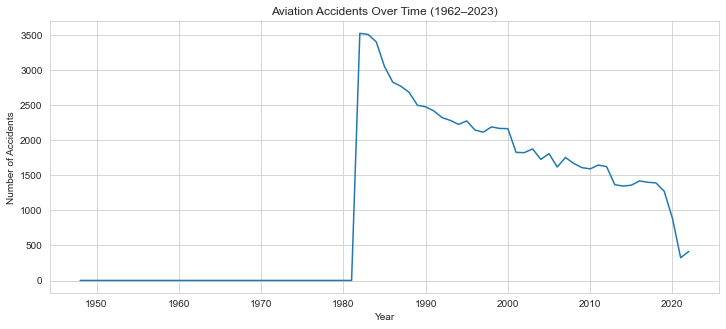

In [30]:
accidents_per_year = df_aviation.groupby("Year")["Event.Id"].count()

plt.figure(figsize=(12,5))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title("Aviation Accidents Over Time (1962–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()


Observation: Aviation accidents have declined steadily since the 1980s.

Insight: This reflects industry-wide improvements in technology, training, and regulation, showing that the aviation sector has become safer.

Risky Models (Top 5 Fatalities)

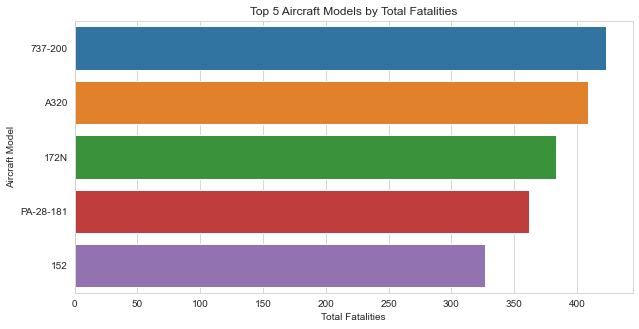

In [40]:
fatalities_by_model = (df_aviation.groupby("Model")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).head(5))

plt.figure(figsize=(10,5))
sns.barplot(x=fatalities_by_model.values, y=fatalities_by_model.index)
plt.title("Top 5 Aircraft Models by Total Fatalities")
plt.xlabel("Total Fatalities")
plt.ylabel("Aircraft Model")
plt.show()


Observation: Popular general aviation models such as 737-200, A320, 172N appear among the highest in total fatalities.

Insight: High fatality counts are driven by widespread use of these aircraft, not necessarily poor design — risk should be assessed relative to fleet size and usage.

Top Manufacturers(Make)

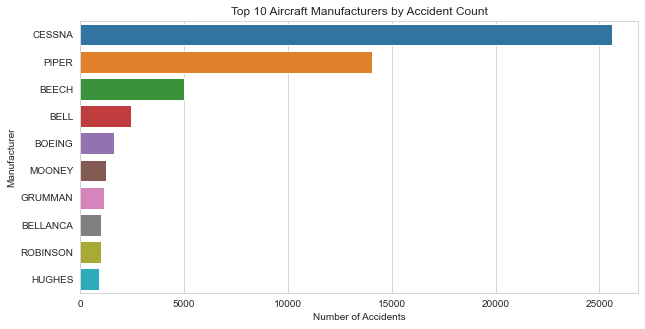

In [31]:
top_makes = df_aviation["Make"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top 10 Aircraft Manufacturers by Accident Count")
plt.xlabel("Number of Accidents")
plt.ylabel("Manufacturer")
plt.show()


Observation: Cessna, Piper, and Beech dominate the accident records, while Boeing and other large manufacturers appear less frequently.

Insight: Accident frequency often reflects the size of the active fleet; smaller GA aircraft are used far more, so they naturally show higher accident counts.

Engine Type

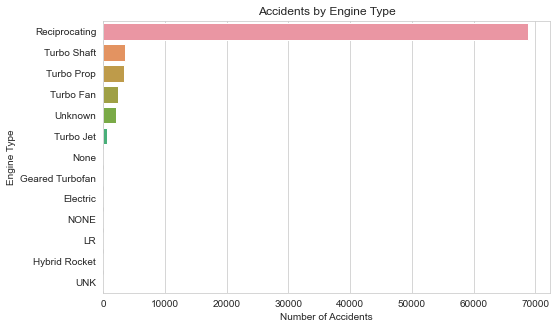

In [32]:
engine_type_counts = df_aviation["Engine.Type"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=engine_type_counts.values, y=engine_type_counts.index)
plt.title("Accidents by Engine Type")
plt.xlabel("Number of Accidents")
plt.ylabel("Engine Type")
plt.show()


Observation: Reciprocating engines account for most accidents, while jet and turboprop engines show much lower counts.

Insight: Private piston-engine aircraft carry higher accident exposure, whereas jet engines used in commercial aircraft are associated with greater safety and reliability.

Number Of Engines

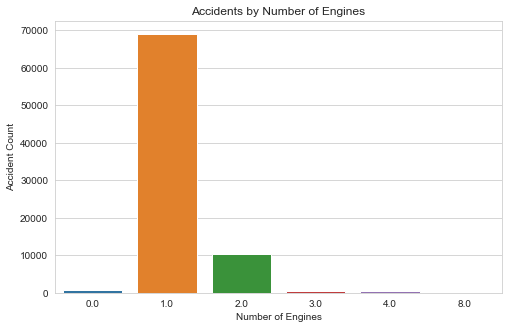

In [33]:
engines_counts = df_aviation["Number.of.Engines"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=engines_counts.index, y=engines_counts.values)
plt.title("Accidents by Number of Engines")
plt.xlabel("Number of Engines")
plt.ylabel("Accident Count")
plt.show()


Observation: The majority of accidents involve single-engine aircraft, with far fewer incidents among multi-engine planes.

Insight: Engine redundancy improves safety, suggesting that multi-engine aircraft are safer investments for new commercial operations.

Injury Severity

In [38]:
def simplify_severity(x):
    if pd.isna(x):
        return "Unknown"
    x = str(x).lower()
    if "fatal" in x:
        return "Fatal"
    elif "serious" in x:
        return "Serious"
    elif "minor" in x:
        return "Minor"
    elif "non" in x:  # catches "Non-Fatal"
        return "Non-Fatal"
    else:
        return "Other"

df_aviation["Severity_Simple"] = df_aviation["Injury.Severity"].apply(simplify_severity)


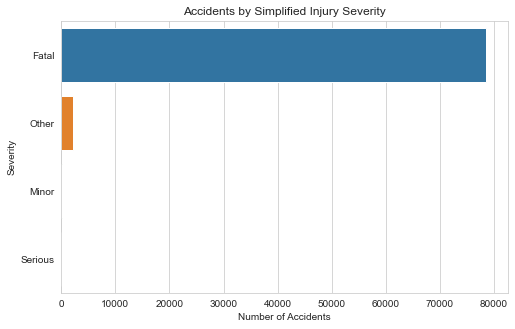

In [39]:
severity_counts = df_aviation["Severity_Simple"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=severity_counts.values, y=severity_counts.index)
plt.title("Accidents by Simplified Injury Severity")
plt.xlabel("Number of Accidents")
plt.ylabel("Severity")
plt.show()


Observation: Though fatal accidents still occur in a significant number of cases, most accidents are non-fatal.

Insight: While many accidents do not result in loss of life, the presence of fatal events, which are serious when they occur, highlights the importance of careful aircraft selection and safety planning.

RECOMMENDATIONS

1. The company should invest in multi-engine aircraft (twin turboprops, regional jets) rather than single-engine planes to minimize operational risk in commercial ventures.

2. Modern aircraft benefit from better technology, design, and regulation, making them safer than older models.
The company should select aircraft models with strong safety performance in the last 20 years and avoid purchasing outdated aircraft, even if they are low-cost.

Aircraft with consistently lower fatalities per event (e.g modern Cessna 172, Boeing 777) represent lower operational risk.
Begin with training and private rental operations using low-risk general aviation models and expand into larger, proven safe aircraft once infrastructure and operational readiness are established.

CONCLUSION